# Importing Libraries and Loading Data

In [31]:
import pandas as pd
import os
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier

from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
import pickle

In [14]:
data=pd.read_csv('https://raw.githubusercontent.com/shaunak09vb/Fake-News-Detection-for-Covid19/master/corona_fake.csv')

In [15]:
data

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


# Data Exploration and Data Engineering

In [4]:
data['label'].value_counts()

TRUE    584
Fake    345
fake    230
Name: label, dtype: int64

### Replacing Labels

In [16]:
data["label"]= data["label"].str.replace("fake", "FAKE", case = False) 

In [17]:
data["label"]= data["label"].str.replace("Fake", "FAKE", case = False) 

In [18]:
data['label'].value_counts()

TRUE    584
FAKE    575
Name: label, dtype: int64

### Filling Rows with Missing Labels

In [19]:
label_column=data['label'].isnull()
label_column

for i in range (1164):
    if(label_column[i]==True):
        print(i)
########################################
data.loc[5]['label'] = 'FAKE'
data.loc[15]['label'] = 'TRUE'
data.loc[43]['label'] = 'FAKE'
data.loc[131]['label'] = 'TRUE'
data.loc[242]['label'] = 'FAKE'

5
15
43
131
242


### Filling Missing Values

In [22]:
data.isnull().sum()

title     82
text      10
source    20
label      0
dtype: int64

In [23]:
data=data.fillna(' ')
print(data.isnull().sum())

title     0
text      0
source    0
label     0
dtype: int64


### Combining Title and Text column

In [24]:
data['total']=data['text']+' '+data['title']

In [25]:
data.head(10)

,title,text,source,label,total
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,FAKE,"You just need to add water, and the drugs and ..."
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,FAKE,Hydroxychloroquine has been shown to have a 10...
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,FAKE,Fact: Hydroxychloroquine has been shown to hav...
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,FAKE,The Corona virus is a man made virus created i...
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,FAKE,Doesn’t @BillGates finance research at the Wuh...
5,CORONA UNMASKED: Chinese Intelligence Officer ...,,,FAKE,CORONA UNMASKED: Chinese Intelligence Office...
6,,Urgent: Health Bulletin to the Public. Ministr...,Ministry of Health,FAKE,Urgent: Health Bulletin to the Public. Ministr...
7,,"Pls tell ur families, relatives and friendsMOH...",NWLLAB,FAKE,"Pls tell ur families, relatives and friendsMOH..."
8,,SERIOUS EXCELLENT ADVICE by Japanese doctors t...,Japanese doctors treating COVID-19 cases,FAKE,SERIOUS EXCELLENT ADVICE by Japanese doctors t...
9,Basic protective measures against the new coro...,Stay aware of the latest information on the CO...,https://www.who.int/emergencies/diseases/novel...,TRUE,Stay aware of the latest information on the CO...


### Removing punctuations and converting data to lowercase

In [26]:
data['total'] = data['total'].str.replace('[^\w\s]','')
data['total'] = data['total'].str.lower()

In [27]:
data['total'][0]

'you just need to add water and the drugs and vaccines are ready to be administered there are two parts to the kit one holds pellets containing the chemical machinery that synthesises the end product and the other holds pellets containing instructions that telll the drug which compound to create mix two parts together in a chosen combination add water and the treatment is ready due to the recent outbreak for the coronavirus covid19 the world health organization is giving away vaccine kits just pay 495 for shipping'

In [28]:
data['total'][45]

'the covid2019 epidemic which began in the chinese city of wuhan managed to get out of china and spread throughout the world in two months in midmarch an article became popular in social networks according to which a dangerous strain was artificially created as part of a study of bat coronavirus by american scientists the scientific work was written by a team of biologists back in 2015 on november 9 of the same year it was published on the scientific portal nature  researchers studied the shco14 virus found in chinese horseshoe bats scientists combined this strain with another  its name is sars and it causes a severe acute respiratory syndrome or sars further the researchers generated and characterized a chimeric virus that can  multiply in the primary cells of the human respiratory tract in other words biologists altered the coronavirus of bats so much that they got a strain that could infect a person  and the virus would cause severe pneumonia in him among the authors of the article 

### Changing Target Labels to 1 and 0

In [29]:
for i in range (1164):
    if data['label'][i]=="FAKE":
        data['label'][i]=0
    else:
        data['label'][i]=1
        
data['label']

0       0
1       0
2       0
3       0
4       0
       ..
1159    1
1160    1
1161    1
1162    1
1163    1
Name: label, Length: 1164, dtype: object

### Word Cloud Visualization

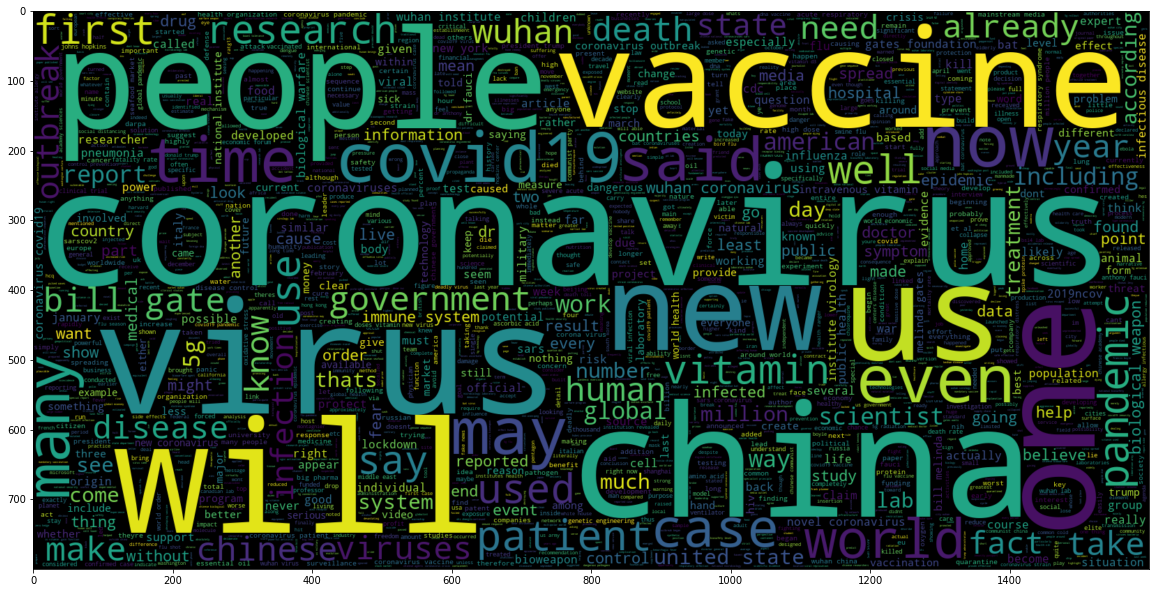

In [35]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.label == 0].total))
plt.imshow(wc, interpolation = 'bilinear')

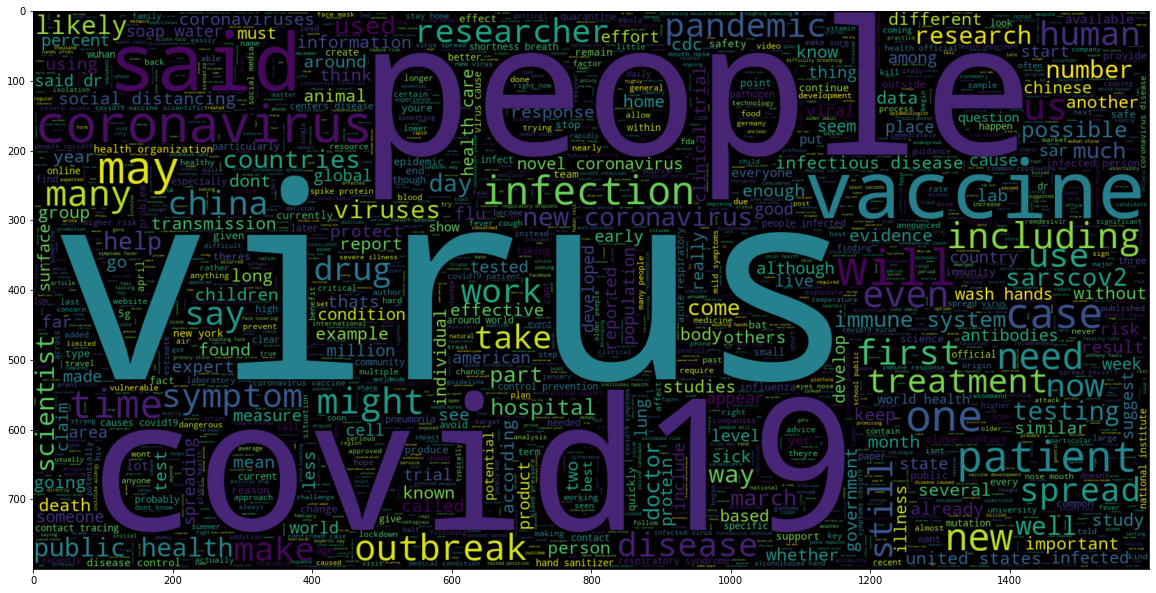

In [36]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.label == 1].total))
plt.imshow(wc, interpolation = 'bilinear')

## Train-Test Split

In [38]:
y=data.label
y

0       0
1       0
2       0
3       0
4       0
       ..
1159    1
1160    1
1161    1
1162    1
1163    1
Name: label, Length: 1164, dtype: object

In [39]:
data.drop("label", axis=1,inplace=True)
data.head(10) 

,title,text,source,total
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,you just need to add water and the drugs and v...
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,hydroxychloroquine has been shown to have a 10...
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fact hydroxychloroquine has been shown to have...
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,the corona virus is a man made virus created i...
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,doesnt billgates finance research at the wuhan...
5,CORONA UNMASKED: Chinese Intelligence Officer ...,,,corona unmasked chinese intelligence officer...
6,,Urgent: Health Bulletin to the Public. Ministr...,Ministry of Health,urgent health bulletin to the public ministry ...
7,,"Pls tell ur families, relatives and friendsMOH...",NWLLAB,pls tell ur families relatives and friendsmoh ...
8,,SERIOUS EXCELLENT ADVICE by Japanese doctors t...,Japanese doctors treating COVID-19 cases,serious excellent advice by japanese doctors t...
9,Basic protective measures against the new coro...,Stay aware of the latest information on the CO...,https://www.who.int/emergencies/diseases/novel...,stay aware of the latest information on the co...


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data['total'], y, test_size=0.2,random_state=102)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(931,) (931,)
(233,) (233,)


In [41]:
X_train.head()

882     viruses cannot travel on radio wavesmobile net...
1053    population reduction is among the goals of the...
404     so bill gates is launching implantable chips t...
502     this video shows why big telecom loves coronav...
68      the coronavirus is a highly infectious disease...
Name: total, dtype: object

In [45]:
y_train = np.asarray(y_train,dtype=np.float)

In [48]:
y_test = np.asarray(y_test,dtype=np.float)

### Cleaning Data using NLP Techniques

In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.80)  
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Implementing Classification Algorithm

### Support Vector Machine

In [43]:
support_vector_machine=svm.SVC(kernel='linear')

In [46]:
support_vector_machine.fit(tfidf_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
pred3 = support_vector_machine.predict(tfidf_test)

print('Accuracy of SVM on test set:',accuracy_score(y_test, pred3))

Accuracy of SVM on test set: 0.944206008583691


In [50]:
results3=confusion_matrix(y_test, pred3)
print(results3)

[[119   7]
 [  6 101]]


# Pipeline Creation

In [51]:
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf',svm.SVC(kernel='linear'))])

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degr

In [54]:
result=pipeline.predict(["One of the challenges being faced worldwide is the rate of infection of health professionals while treating COVID-19 patients.  2016 statistics show the following picture of Rwanda’s health sector: 1/50,505 ground ambulance / population Ratio; 1/10,055 Doctor/population ratio; 1/1,094 Nurse/population ratio; 1/10,500 Laboratory technicians /population ratio. Although Rwanda is on track to meeting most of the required quota, the country cannot afford the set back that a pandemic like COVID-19 among health professionals would cause. To minimize contact time with confirmed cases and therefore reducing the risk of contamination of health professionals in COVID-19 treatment centres, robots were deployed. At Gatenga and Kanyinya treatment centres in Kigali City, visits by medical staff to patients went from 3-4 to 2 per day since May 2020. The 5 human-size robots are programmed to perform temperature screening, take readings of vitals, deliver video messages and detect people not wearing masks then instruct them to wear masks properly. On Tuesday, May 19 at the Kanyinya COVID-19 Treatment Centre, the 5 robots were launched by the Ministry of Health. Named in Kinyarwanda, Akazuba, Ikirezi, Mwiza, Ngabo, and Urumuri are made by Zora Bots, a Belgian company specialised in robotics. They were acquired through a partnership between the UNDP Rwanda Accelerator Lab (AccLab) and the Ministry of ICT and Innovation.  Each robot costs about $30,000. Urumuri is currently deployed at the Kigali International Airport with the capacity to screen 50 to 150 people per minute and report abnormalities to officers on duty. As Rwanda is reopening Kigali International Airport for commercial international flights from 1st of August, Urumuri will allow to speed up mass screenings of fever for passengers as they land. Smart anti-epidemic robots have been used in Asia to help flatten the COVID-19 curve. The pandemic has proven to be a crosscutting challenge affecting Rwanda in all sectors (Health, Economy, Education, Agriculture, …). It therefore requires different sometimes innovative solutions with available resources like robots."])

In [57]:
if result[0]==0.0:
  print("News article is Fake")
else:
  print("News article is Real")

News article is Real
